In [1]:

# Standard Libraries
import os  # Access directory
import warnings
warnings.filterwarnings('ignore')

# External Libraries
import numpy as np  # Linear algebra
import pandas as pd  # Data processing
import seaborn as sns
import matplotlib.pyplot as plt  # Plotting
%matplotlib inline

# Data Visualization
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [57]:
#upload files
from google.colab import files
upload = files.upload()



In [5]:
#specified files/directory
print(os.listdir('../content'))


['.config', 'Mall_Customers.csv', 'sample_data']


In [6]:
# number of rows to read
n_rows_read = None

# Read the CSV file into a DataFrame
dataset = pd.read_csv(
    filepath_or_buffer='../content/Mall_Customers.csv',
    delimiter=',',
    nrows=n_rows_read
)

# attribute to the DataFrame
dataset.dataframeName = 'Mall_Customers.csv'

# dimensions of the DataFrame
n_row, n_col = dataset.shape

# Print the number of rows and columns
print('Dataset consists of {} rows and {} columns'.format(n_row, n_col))

Dataset consists of 200 rows and 5 columns


In [7]:
dataset.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [9]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
#identify null values
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
#descriptive statistics
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000





Exploratory Data Analysis:

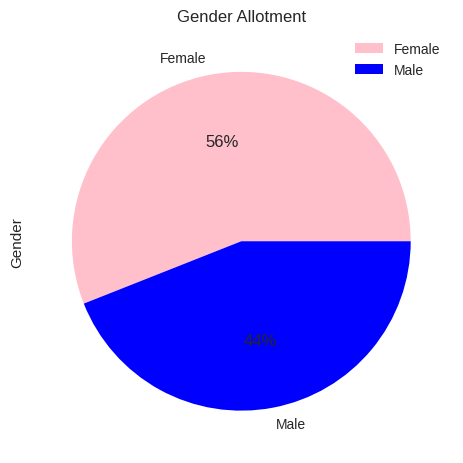

In [13]:
#pie chart plot
gender_counts = dataset.Gender.value_counts()
# Define colors for each gender category
colors = ['pink', 'blue']

# pie chart plot
gender_counts.plot(kind='pie', autopct='%1.0f%%', colors=colors)

# title
plt.title('Gender Allotment')

#legend
plt.legend()

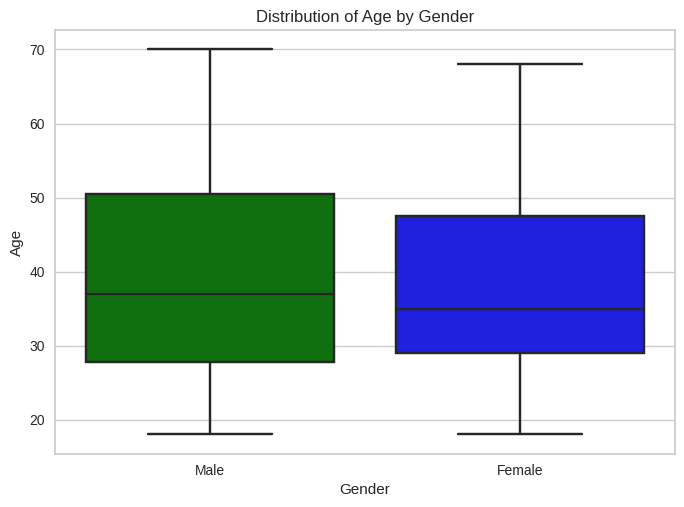

In [14]:
# DataFrame with 'Gender' and 'Age' columns

dataset = pd.read_csv('Mall_Customers.csv')
# box plot
sns.boxplot(x='Gender', y='Age', data=dataset, palette=['green', 'blue'])

# labels and title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()


Age Distribution by Gender

For both genders, the Age interquartile range (IQR) is wide between mid-20s to early 50s, indicating diverse age groups.

The median age for females (36 years) is slightly higher than males (34 years) in the dataset.

There are more female age outliers on the higher side (upto late 60s) compared to males showing relatively older female customers.

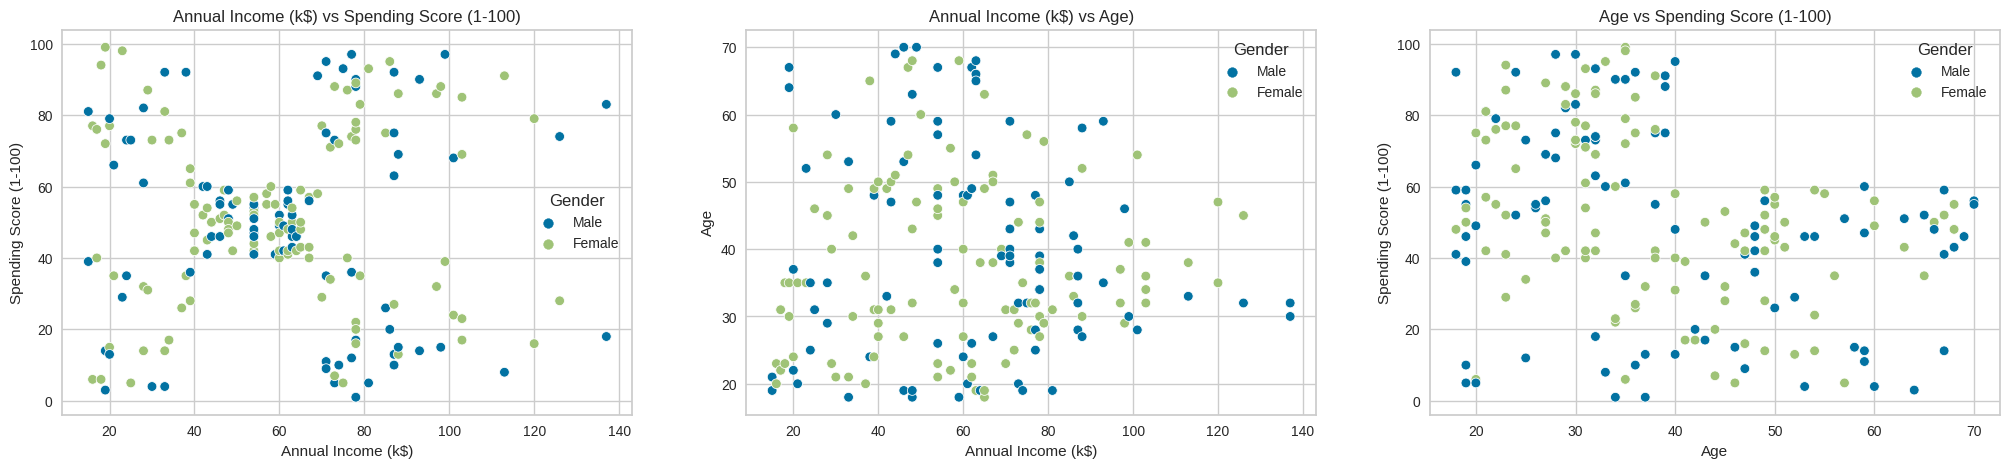

In [15]:
#scatterplot
np.random.seed(42)
data = {'Annual Income (k$)': np.random.randint(40, 52, 54),
        'Age': np.random.randint(20, 35, 60),
        'Spending Score (1-100)': np.random.randint(14, 47, 65),
        'Gender': np.random.choice(['Male', 'Female'], size=100)}

dataset.dataframeName ='Mall_Customers.csv'

# Creating subplots with scatter plots
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

# Scatter plot 1
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', ax=axes[0])
axes[0].set_title('Annual Income (k$) vs Spending Score (1-100)')

# Scatter plot 2
sns.scatterplot(data=dataset, x='Age', y='Spending Score (1-100)', hue='Gender', ax=axes[2])
axes[2].set_title('Age vs Spending Score (1-100)')

# Scatter plot 3
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Age', hue='Gender', ax=axes[1])
axes[1].set_title('Annual Income (k$) vs Age)')

plt.show()

In [17]:
# Load the data from Mall_Customers.csv
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Scale selected numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# print first few rows of the scaled DataFrame
print("Scaled DataFrame:")
print(data.head())

Scaled DataFrame:
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0   -1.723412    Male -1.424569           -1.738999               -0.434801
1   -1.706091    Male -1.281035           -1.738999                1.195704
2   -1.688771  Female -1.352802           -1.700830               -1.715913
3   -1.671450  Female -1.137502           -1.700830                1.040418
4   -1.654129  Female -0.563369           -1.662660               -0.395980


In [21]:
# Read the data
file_path = 'Mall_Customers.csv'
dataset = pd.read_csv(file_path)

# Identify categorical columns for one-hot encoding
categorical_columns = ['Gender']

# One-hot encode the categorical columns
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns)

# Display the original and one-hot encoded DataFrames
print("Original DataFrame:")
print(dataset.head())
print("\nOne-Hot Encoded DataFrame:")
print(dataset_encoded.head())

Original DataFrame:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

One-Hot Encoded DataFrame:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39              0   
1           2   21                  15                      81              0   
2           3   20                  16                       6              1   
3           4   23                  16                      77              1   
4           5   31                  17                      40              1   

   Gender_Male  
0            1  
1    

Initializing K-Means

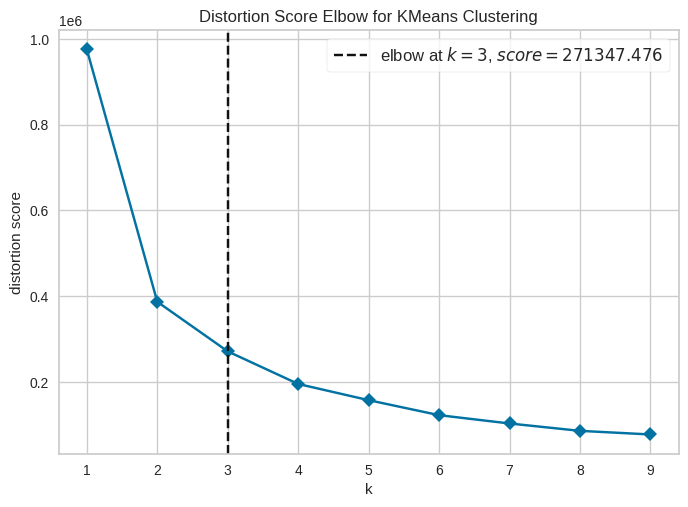

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Extract the numerical columns you want to use for clustering
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
dataset = data[numerical_columns]

# Initialize the KMeans model
model = KMeans()

# Initialize the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)

# Fit the visualizer on the dataset
visualizer.fit(dataset)

# Visualize the elbow plot
visualizer.poof()

In [23]:
# Optimal cluster number
n_clusters = 3

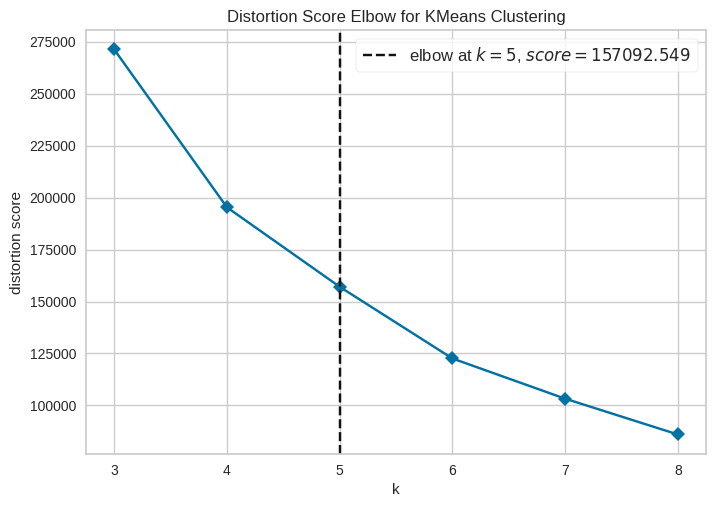

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Extract the numerical columns you want to use for clustering
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
dataset = data[numerical_columns]

# Initialize the KMeans model
model = KMeans()

# Initialize the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(3, 9), timings=False)

# Fit the visualizer on the dataset
visualizer.fit(dataset)

# Visualize the elbow plot
visualizer.poof()

In [26]:
# Optimal cluster number
n_clusters = 5

In [27]:
# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters)
visualizer.fit(dataset)

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(), k=(3, 9), timings=False)

In [28]:

# Display the modified dataset
print(dataset.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


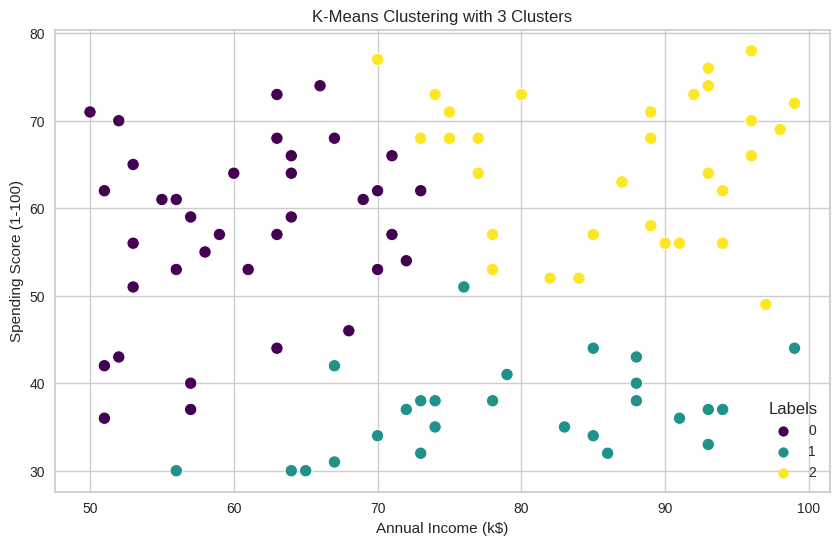

In [29]:
#random data
np.random.seed(42)
data = {'Annual Income (k$)': np.random.randint(50, 100, 100),
        'Spending Score (1-100)': np.random.randint(30, 80, 100)}
new_data= pd.DataFrame(data)

# Performing K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3).fit(new_data[['Annual Income (k$)', 'Spending Score (1-100)']])
new_data['Labels'] = kmeans.labels_

# Visualizing the clusters with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=new_data, palette='viridis', s=80)
plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

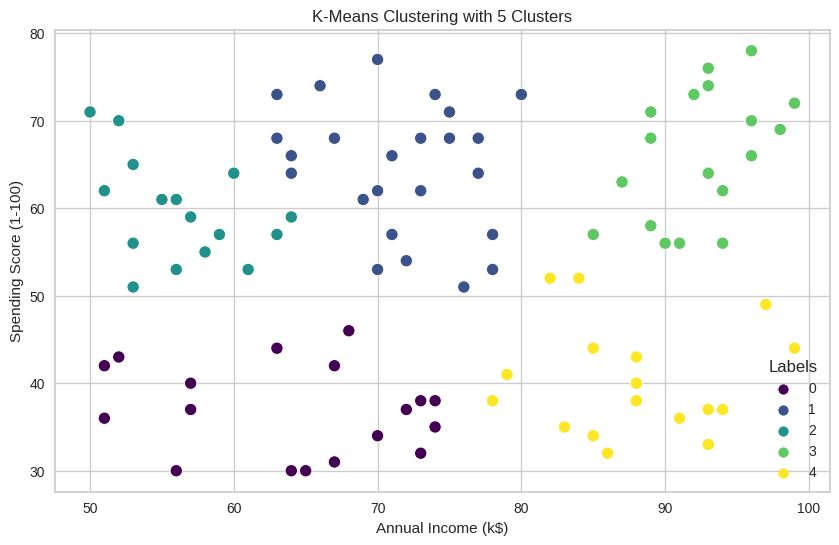

In [30]:
# random data
np.random.seed(42)
data = {'Annual Income (k$)': np.random.randint(50, 100, 100),
        'Spending Score (1-100)': np.random.randint(30, 80, 100)}
new_data = pd.DataFrame(data)

# Performing K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5).fit(new_data)
new_data['Labels'] = kmeans.labels_

# Visualizing the clusters with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=new_data, palette='viridis', s=80)
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

This shows how the k-means algorithm grouped the data into 3 and 5 clusters based on 'Annual Income' and 'Spending Score'.
The size of the markers (points) is set to 80 for better visibility.
The 'viridis' color palette is used to distinguish between different clusters.

K Means Clustering Model

In [32]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset[['Age', 'Annual Income (k$)']])
print(y_predicted)

[4 4 4 4 4 4 4 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 1 4 1 4 4
 4 4 4 1 4 1 4 1 4 1 4 4 4 1 4 4 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 2 2 2 2 1 1 0 0 2 0 0 0 2 0 0 0 1 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [33]:
# Age vs Annual Income
dataset['cluster'] = y_predicted
print(dataset.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1   19                  15                      39        4
1           2   21                  15                      81        4
2           3   20                  16                       6        4
3           4   23                  16                      77        4
4           5   31                  17                      40        4


In [38]:
#array of predicted cluster stored for each row
cluster_centers = km.cluster_centers_
print(cluster_centers)

[[ 37.69642857  78.51785714]
 [ 56.49019608  49.80392157]
 [ 25.06451613  59.48387097]
 [ 36.6        109.7       ]
 [ 30.21428571  27.07142857]]


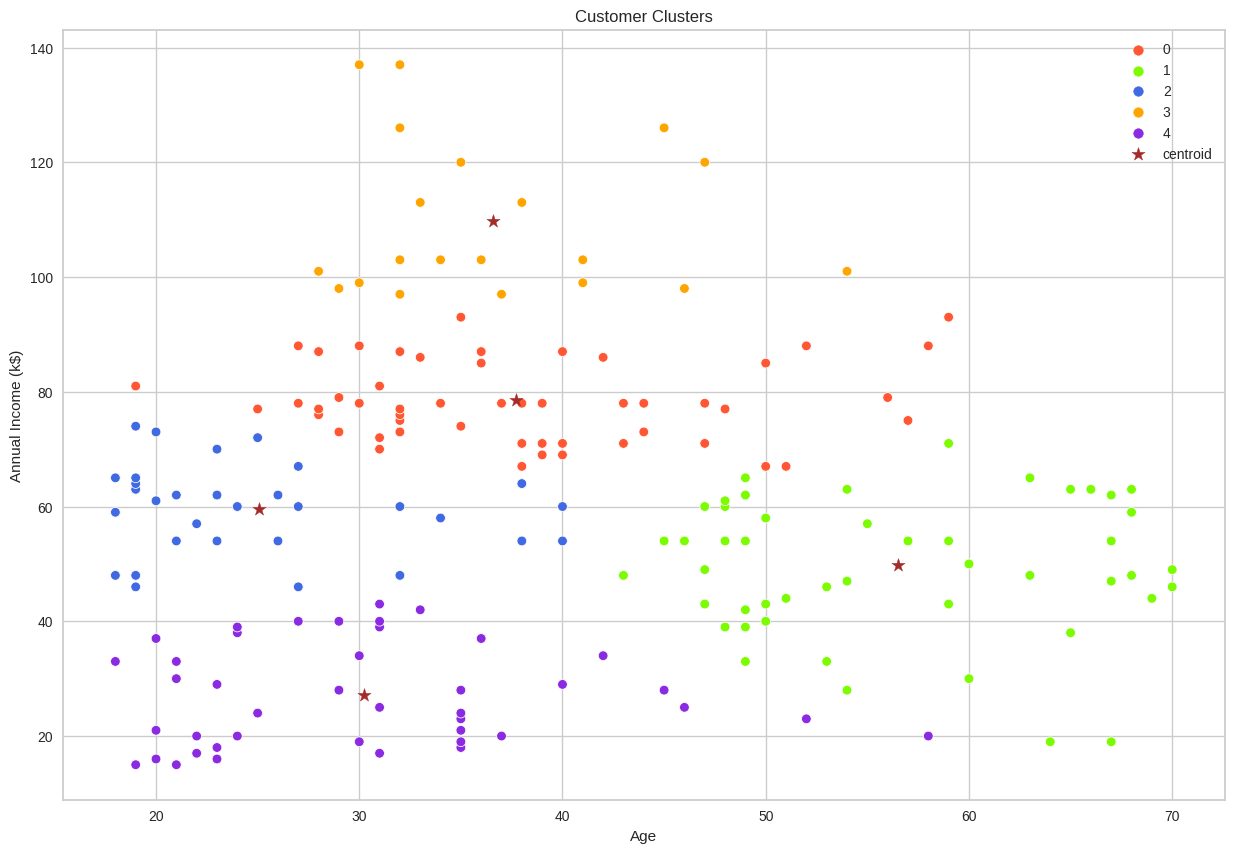

In [39]:
# Set figure size
plt.figure(figsize=(15, 10))

# Define colors for the clusters
colors = ['#FF5733', '#7CFC00', '#4169E1', '#FFA500', '#8A2BE2']


# Create a scatter plot with Seaborn
sns.scatterplot(data=dataset, x='Age', y='Annual Income (k$)', hue='cluster', palette=colors)

# Plot cluster centers with Matplotlib
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=100, c='brown', label='centroid')

# Set plot title and axis labels
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Display the legend
plt.legend()

# Show the plot
plt.show()

Center points for Age and Annual Income with k=5

In [52]:
#array of predicted cluster outcomes
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset[['Spending Score (1-100)', 'Annual Income (k$)']])
print(y_predicted)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [53]:
dataset['cluster'] = y_predicted
print(dataset.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1   19                  15                      39        4
1           2   21                  15                      81        3
2           3   20                  16                       6        4
3           4   23                  16                      77        3
4           5   31                  17                      40        4


In [55]:
#array of predicted cluster stored for each row
cluster_centers = km.cluster_centers_
print(cluster_centers)

[[49.51851852 55.2962963 ]
 [17.11428571 88.2       ]
 [82.12820513 86.53846154]
 [79.36363636 25.72727273]
 [20.91304348 26.30434783]]


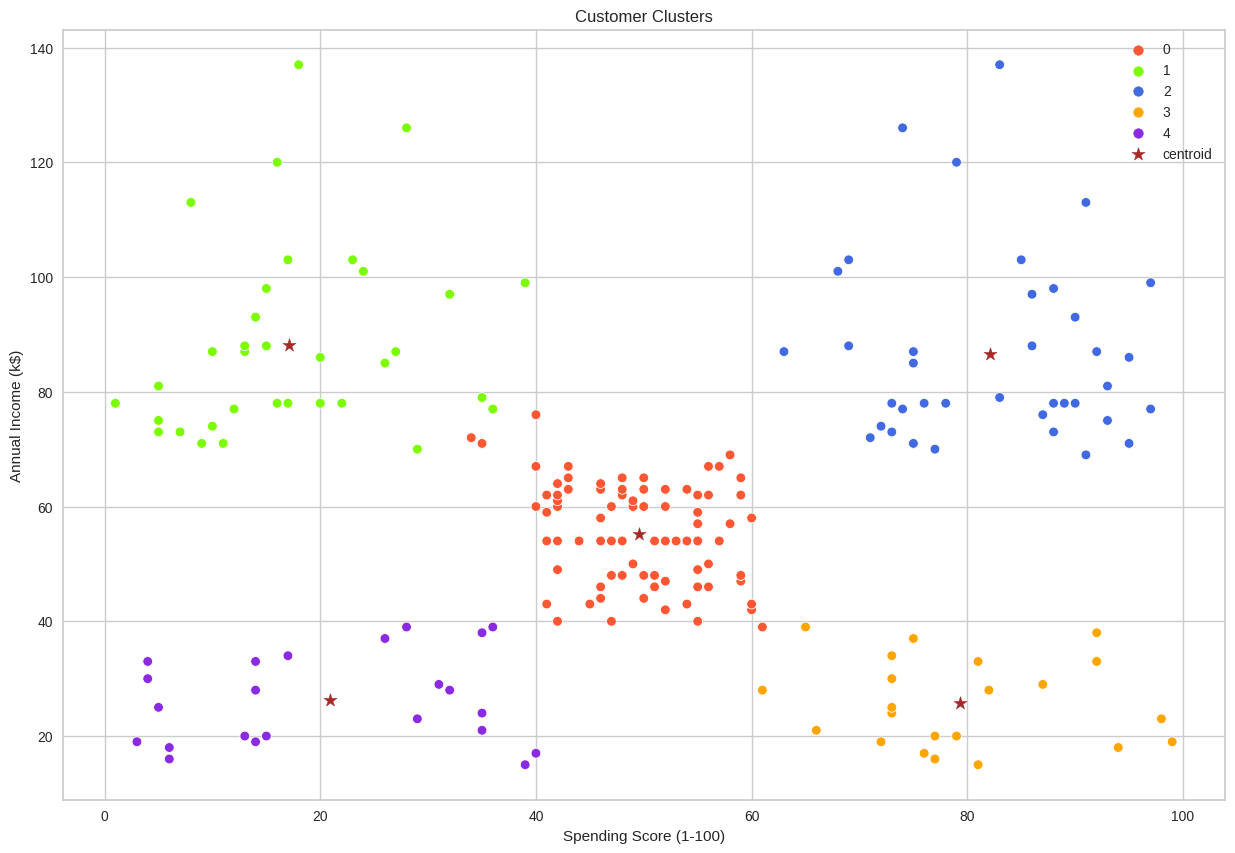

In [56]:
# Set figure size
plt.figure(figsize=(15, 10))

# Define colors for the clusters
colors = ['#FF5733', '#7CFC00', '#4169E1', '#FFA500', '#8A2BE2']


# Create a scatter plot with Seaborn
sns.scatterplot(data=dataset, x='Spending Score (1-100)', y='Annual Income (k$)', hue='cluster', palette=colors)

# Plot cluster centers with Matplotlib
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=100, c='brown', label='centroid')

# Set plot title and axis labels
plt.title('Customer Clusters')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

# Display the legend
plt.legend()

# Show the plot
plt.show()

Center points for Spending Score and Annual Income with K = 5